In [1]:
from pathlib import Path

parent_dir = str(Path.cwd().parent)
%cd $parent_dir

/Users/tomtalpir/Random/pyERGM


In [2]:
from utils import benchmark_generator
from metrics import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Matrix copied manually, TODO - Create a `data` dir in our project and save as a pickle or something.
sampson_matrix = np.array(
    [[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
     [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
     [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
     [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
     [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
     [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
     [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
)

expected_thetas = {"edges": -1.1761, "sender2": -0.2945, "sender3": 1.4141, "sender4": 0.3662, "sender5": 0.1315,
               "sender6": 1.2148, "sender7": 0.6055,
               "sender8": 1.3609, "sender9": 0.6402, "sender10": 2.0639, "sender11": 1.4355, "sender12": -0.1681,
               "sender13": -0.2322, "sender14": 0.5841, "sender15": 1.8600,
               "sender16": 1.4317, "sender17": 1.2211, "sender18": 1.8724, "receiver2": -0.1522, "receiver3": -3.0453,
               "receiver4": -1.7596, "receiver5": -0.8198, "receiver6": -3.3922,
               "receiver7": -1.6074, "receiver8": -2.2656, "receiver9": -2.2069, "receiver10": -3.9189,
               "receiver11": -3.0257, "receiver12": -0.9457, "receiver13": -1.4749, "receiver14": -1.5950,
               "receiver15": -3.3147, "receiver16": -3.0567, "receiver17": -3.4436, "receiver18": -3.3239,
               "mutual": 3.6918
               }

metrics = [NumberOfEdgesDirected(), OutDegree(), InDegree(), TotalReciprocity()]

Saving benchmark results to benchmarks/2024_08_28_17_18_30
1/36 Working on parameters - 
	Finished in 4.208959102630615 seconds, converged = False
	MSE with true thetas = 0.05088931169876143


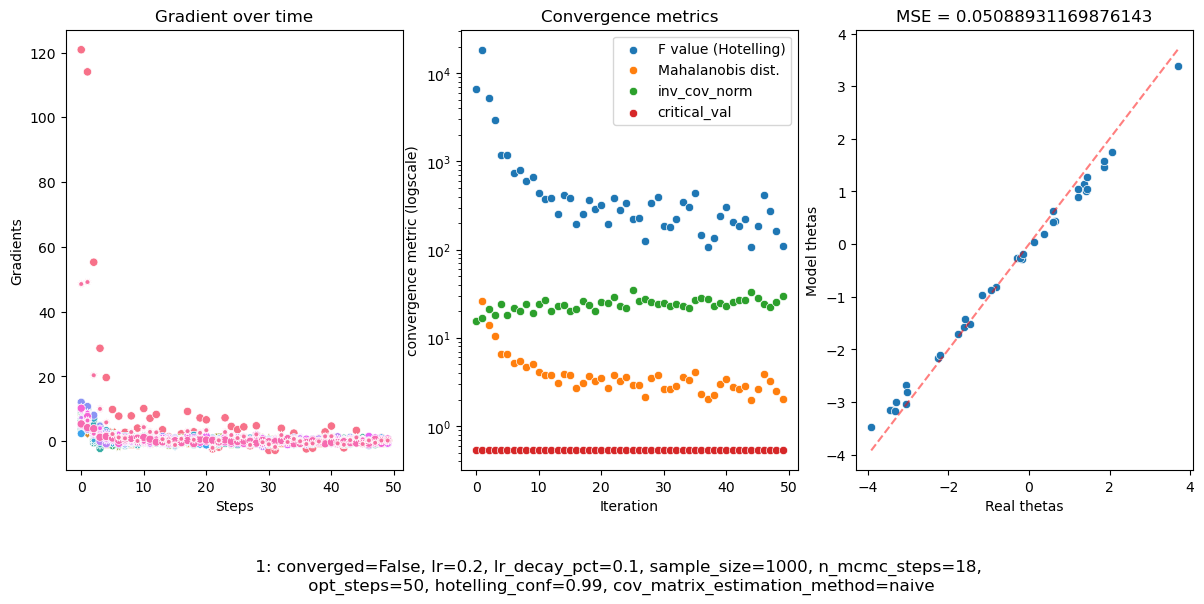

In [4]:
benchmarks = benchmark_generator(sampson_matrix, metrics, is_directed=True,expected_thetas=expected_thetas)

In [5]:
benchmarks_df = pd.DataFrame(benchmarks).sort_values(by='mse')
benchmarks_df.head()


,opt_steps,sample_size,n_mcmc_steps,convergence_criterion,hotelling_conf,lr,lr_decay_pct,cov_matrix_estimation_method,estimated_p_seed,optimization_method,steps_for_decay,sliding_grad_window_k,sample_pct_growth,elapsed_time,converged,final_opt_steps,thetas,idx,mse
0,50,1000,18,hotelling,0.99,0.2,0.1,naive,0.287582,newton_raphson,1,5,0.05,4.208959,False,50,"[-0.9685056871894837, -0.26251958679787646, 1....",1,0.050889


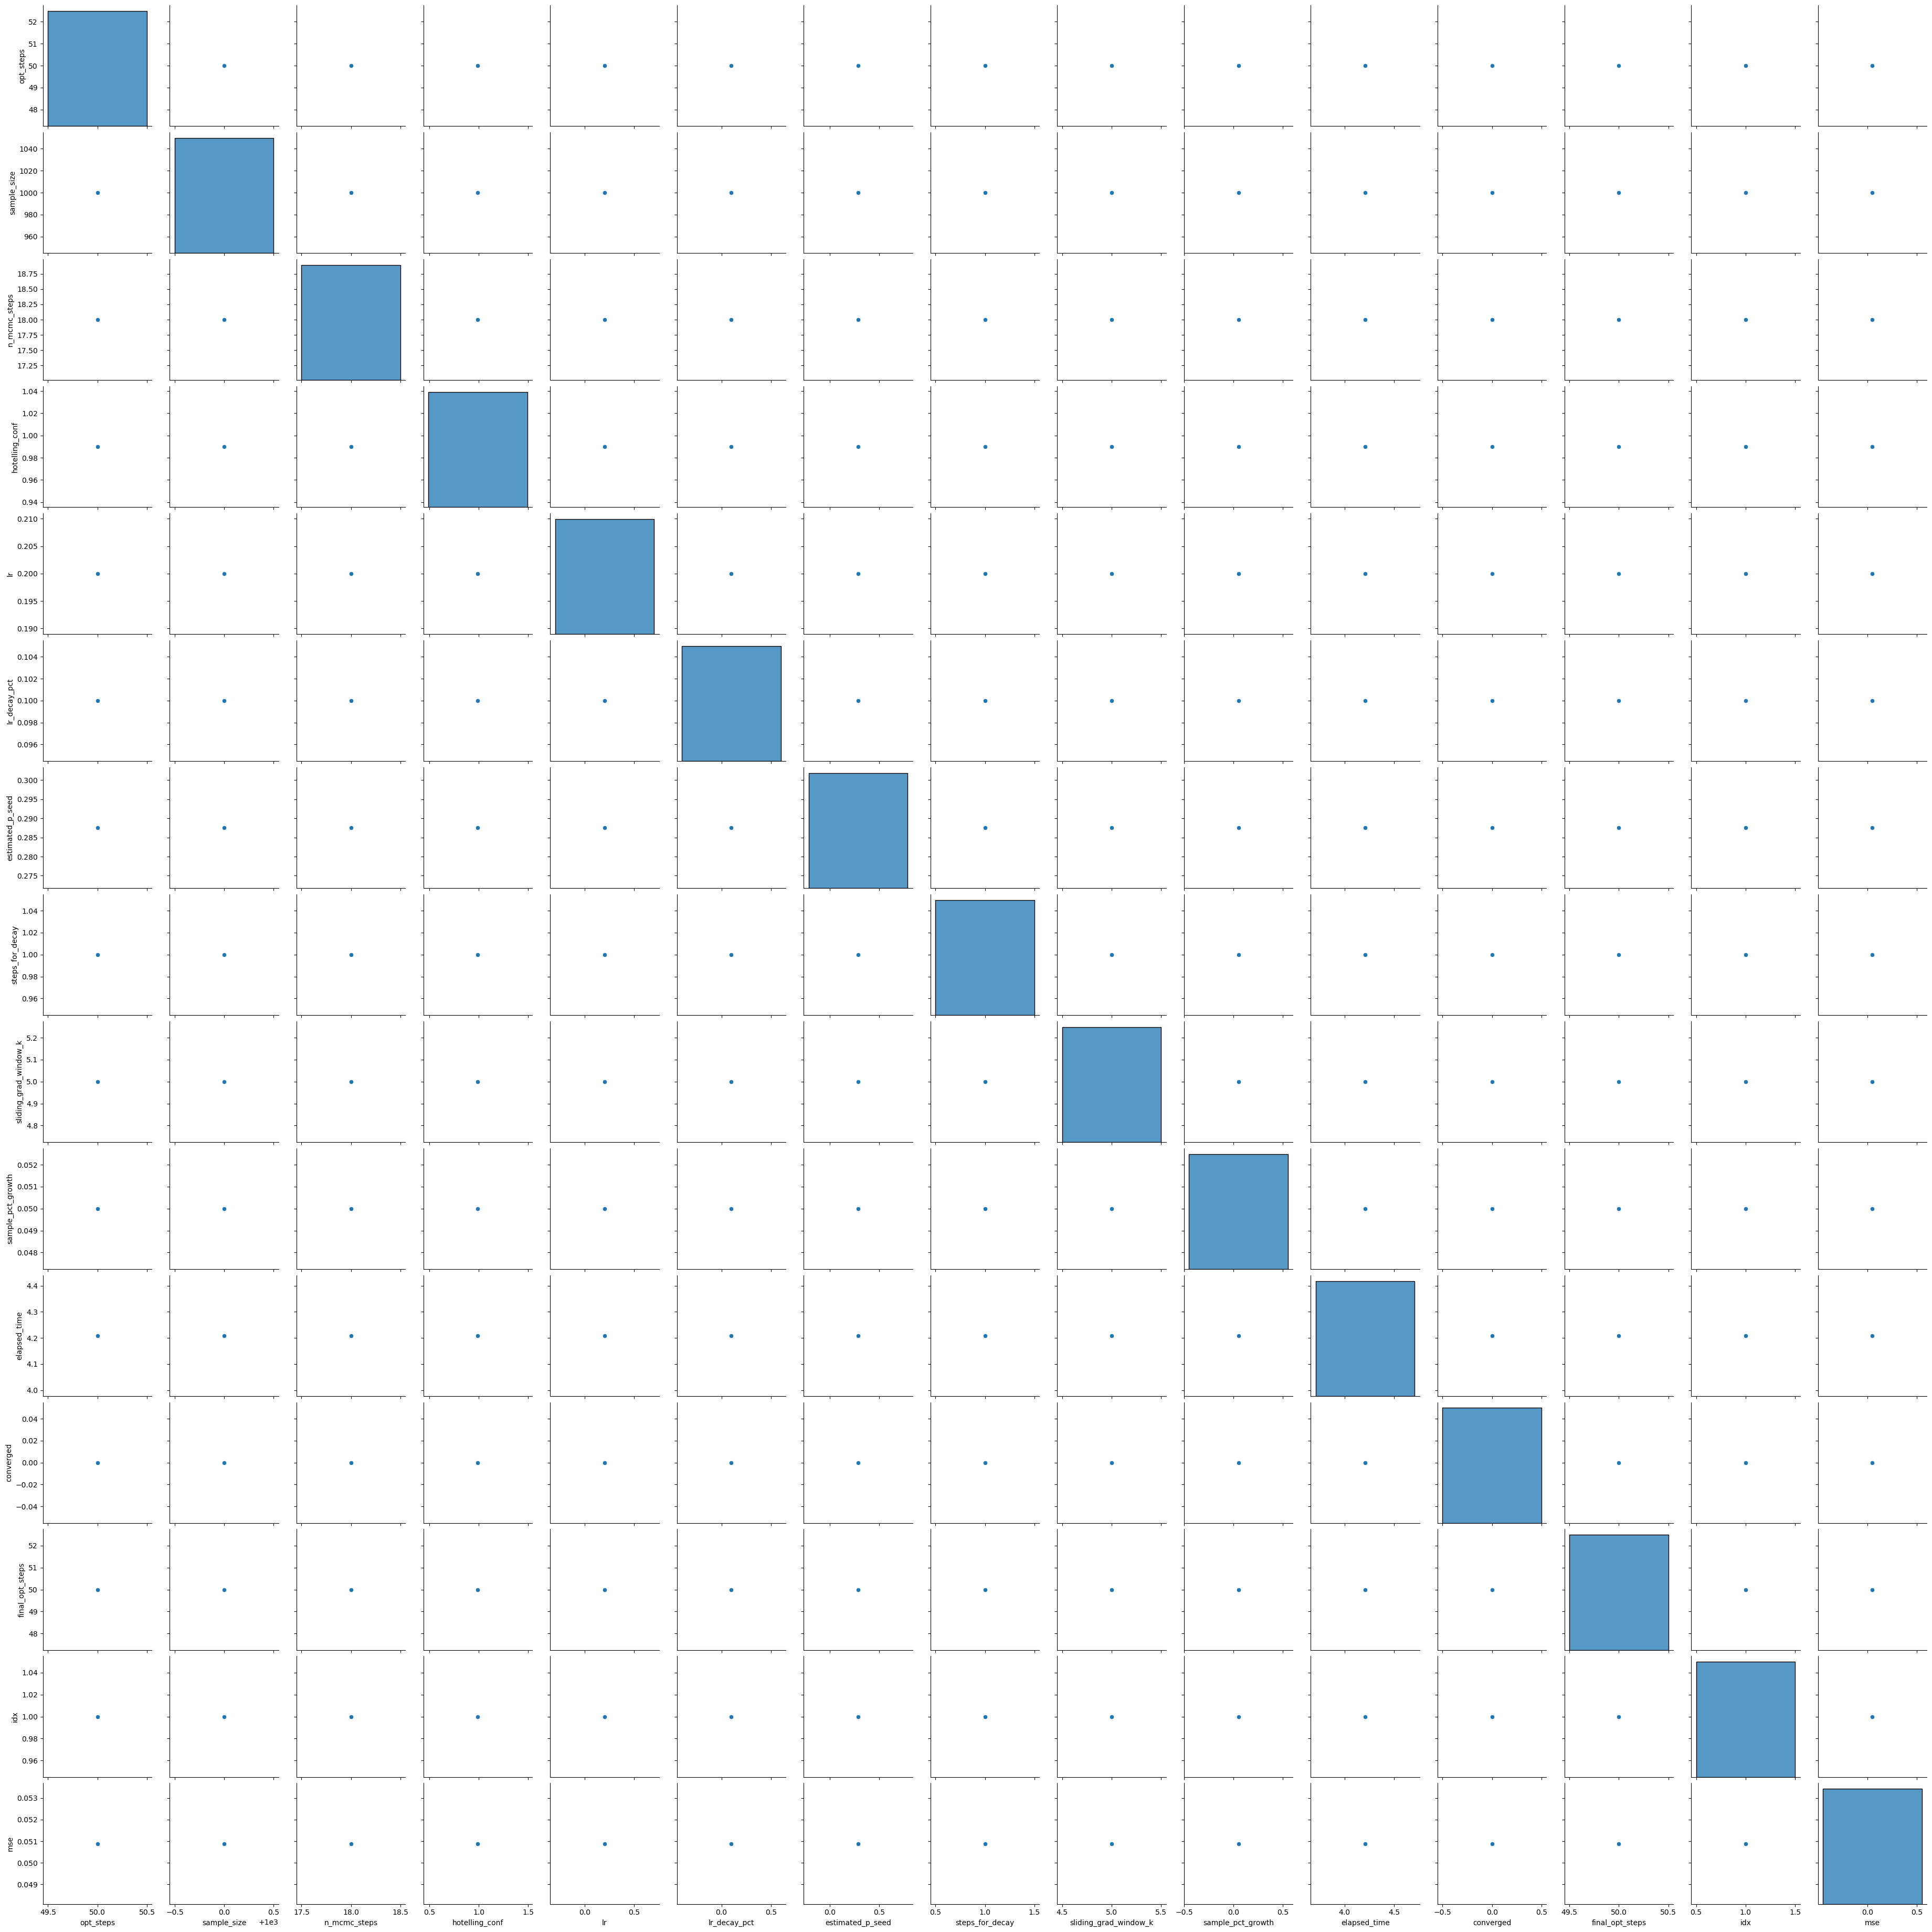

In [6]:
sns.pairplot(benchmarks_df)